In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kernels import TauKernel
from omega_meshes import LinearOmegaMesh

from scipy.integrate import simps
from scipy.special import eval_legendre

from scipy.linalg import svd

omega = np.linspace(-8, 8, 800)

def Aw2Gl_mat(A_arr, omega, beta, np_tau, lmax):
    tau = np.linspace(0, beta, np_tau)
    x = np.linspace(-1, 1, np_tau)

    K = TauKernel(tau=tau, omega=LinearOmegaMesh(omega_min = omega[0], 
                                                 omega_max = omega[-1], 
                                                 n_points=omega.shape[0]),
                  beta=beta)

    legendre_mat = np.zeros((lmax, np_tau), dtype = np.longdouble)

    simps_coeff = np.zeros(np_tau)
    simps_coeff[np.arange(np_tau)%2 == 0] = 2
    simps_coeff[np.arange(np_tau)%2 == 1] = 4
    simps_coeff[0] = 1
    simps_coeff[-1] = 1
    
    for i in range(lmax):
        legendre_mat[i,:] = np.sqrt(2*i + 1, dtype = np.longdouble) * eval_legendre(i,x).astype(np.longdouble) * simps_coeff.astype(np.longdouble)
        
    legendre_mat = legendre_mat * beta/(3*np_tau)

    o2l = legendre_mat.dot((K.K_delta).astype(np.longdouble))
    
    Gl = np.einsum('ij,nj->ni', o2l, A_arr)
        
    return Gl
def o2l(omega, beta, np_tau, lmax):
    tau = np.linspace(0, beta, np_tau)
    x = np.linspace(-1, 1, np_tau)

    K = TauKernel(tau=tau, omega=LinearOmegaMesh(omega_min = omega[0], 
                                                 omega_max = omega[-1], 
                                                 n_points=omega.shape[0]),
                  beta=beta)

    legendre_mat = np.zeros((lmax, np_tau), dtype = np.longdouble)

    simps_coeff = np.zeros(np_tau)
    simps_coeff[np.arange(np_tau)%2 == 0] = 2
    simps_coeff[np.arange(np_tau)%2 == 1] = 4
    simps_coeff[0] = 1
    simps_coeff[-1] = 1
    
    for i in range(lmax):
        legendre_mat[i,:] = np.sqrt(2*i + 1, dtype = np.longdouble) * eval_legendre(i,x).astype(np.longdouble) * simps_coeff.astype(np.longdouble)
        
    legendre_mat = legendre_mat * beta/(3*np_tau)

    o2l = legendre_mat.dot((K.K_delta).astype(np.longdouble))
    
   
        
    return o2l

In [2]:
o2l_mat_b40 = o2l(omega, 40, 80001, 80) #simpson's rule: odd np_tau please!

In [3]:
u_b40, s_b40, vh_b40 = svd(o2l_mat_b40, lapack_driver='gesvd')

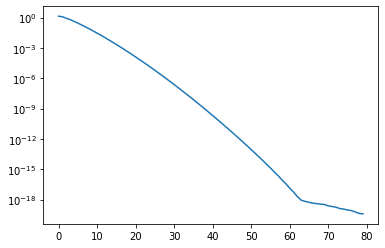

In [4]:
plt.plot(s_b40)
plt.yscale('log')
plt.show()